# Data explore

In [1]:
import pandas as pd


dataDf = pd.read_csv("./Wind-Turbine-SCADA-signals.csv")
dataDf.head()

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
0,T01,2016-01-01T00:00:00+00:00,1277.4,1226.1,1249.0,9.0,41.0,58,59,58,...,-144.4,0.0,-584.5,157.1,144.4,584.5,0.0,157.1,37,218.5
1,T01,2016-01-01T00:10:00+00:00,1268.3,93.3,999.7,435.9,41.0,58,59,59,...,-79.6,0.0,-501.0,123.7,79.6,501.0,0.0,123.7,37,218.5
2,T01,2016-01-01T00:20:00+00:00,1394.4,220.3,774.0,486.1,41.0,57,57,57,...,-314.0,0.0,-1000.0,357.4,314.0,1000.0,0.0,357.4,37,213.3
3,T01,2016-01-01T00:30:00+00:00,1306.6,1212.4,1257.1,17.0,40.0,56,57,57,...,-654.0,0.0,-1000.0,245.8,654.0,1000.0,0.0,245.8,36,222.4
4,T01,2016-01-01T00:40:00+00:00,1320.9,1224.1,1257.7,18.0,40.0,57,58,57,...,-496.1,0.0,-1000.0,302.7,496.1,1000.0,0.0,302.7,36,222.4


In [2]:
for col in dataDf.columns:
    print(col)
    print(dataDf[col].describe())
    print("-"*50)

Turbine_ID
count     417141
unique         4
top          T11
freq      104798
Name: Turbine_ID, dtype: object
--------------------------------------------------
Timestamp
count                        417141
unique                       104909
top       2017-10-29T02:50:00+00:00
freq                              8
Name: Timestamp, dtype: object
--------------------------------------------------
Gen_RPM_Max
count    417141.000000
mean       1190.486434
std         631.827468
min           0.000000
25%         315.200000
50%        1417.700000
75%        1683.800000
max        2040.900000
Name: Gen_RPM_Max, dtype: float64
--------------------------------------------------
Gen_RPM_Min
count    417141.000000
mean        936.670981
std         607.263095
min           0.000000
25%         194.800000
50%        1231.100000
75%        1359.600000
max        1675.600000
Name: Gen_RPM_Min, dtype: float64
--------------------------------------------------
Gen_RPM_Avg
count    417141.000000
mean 

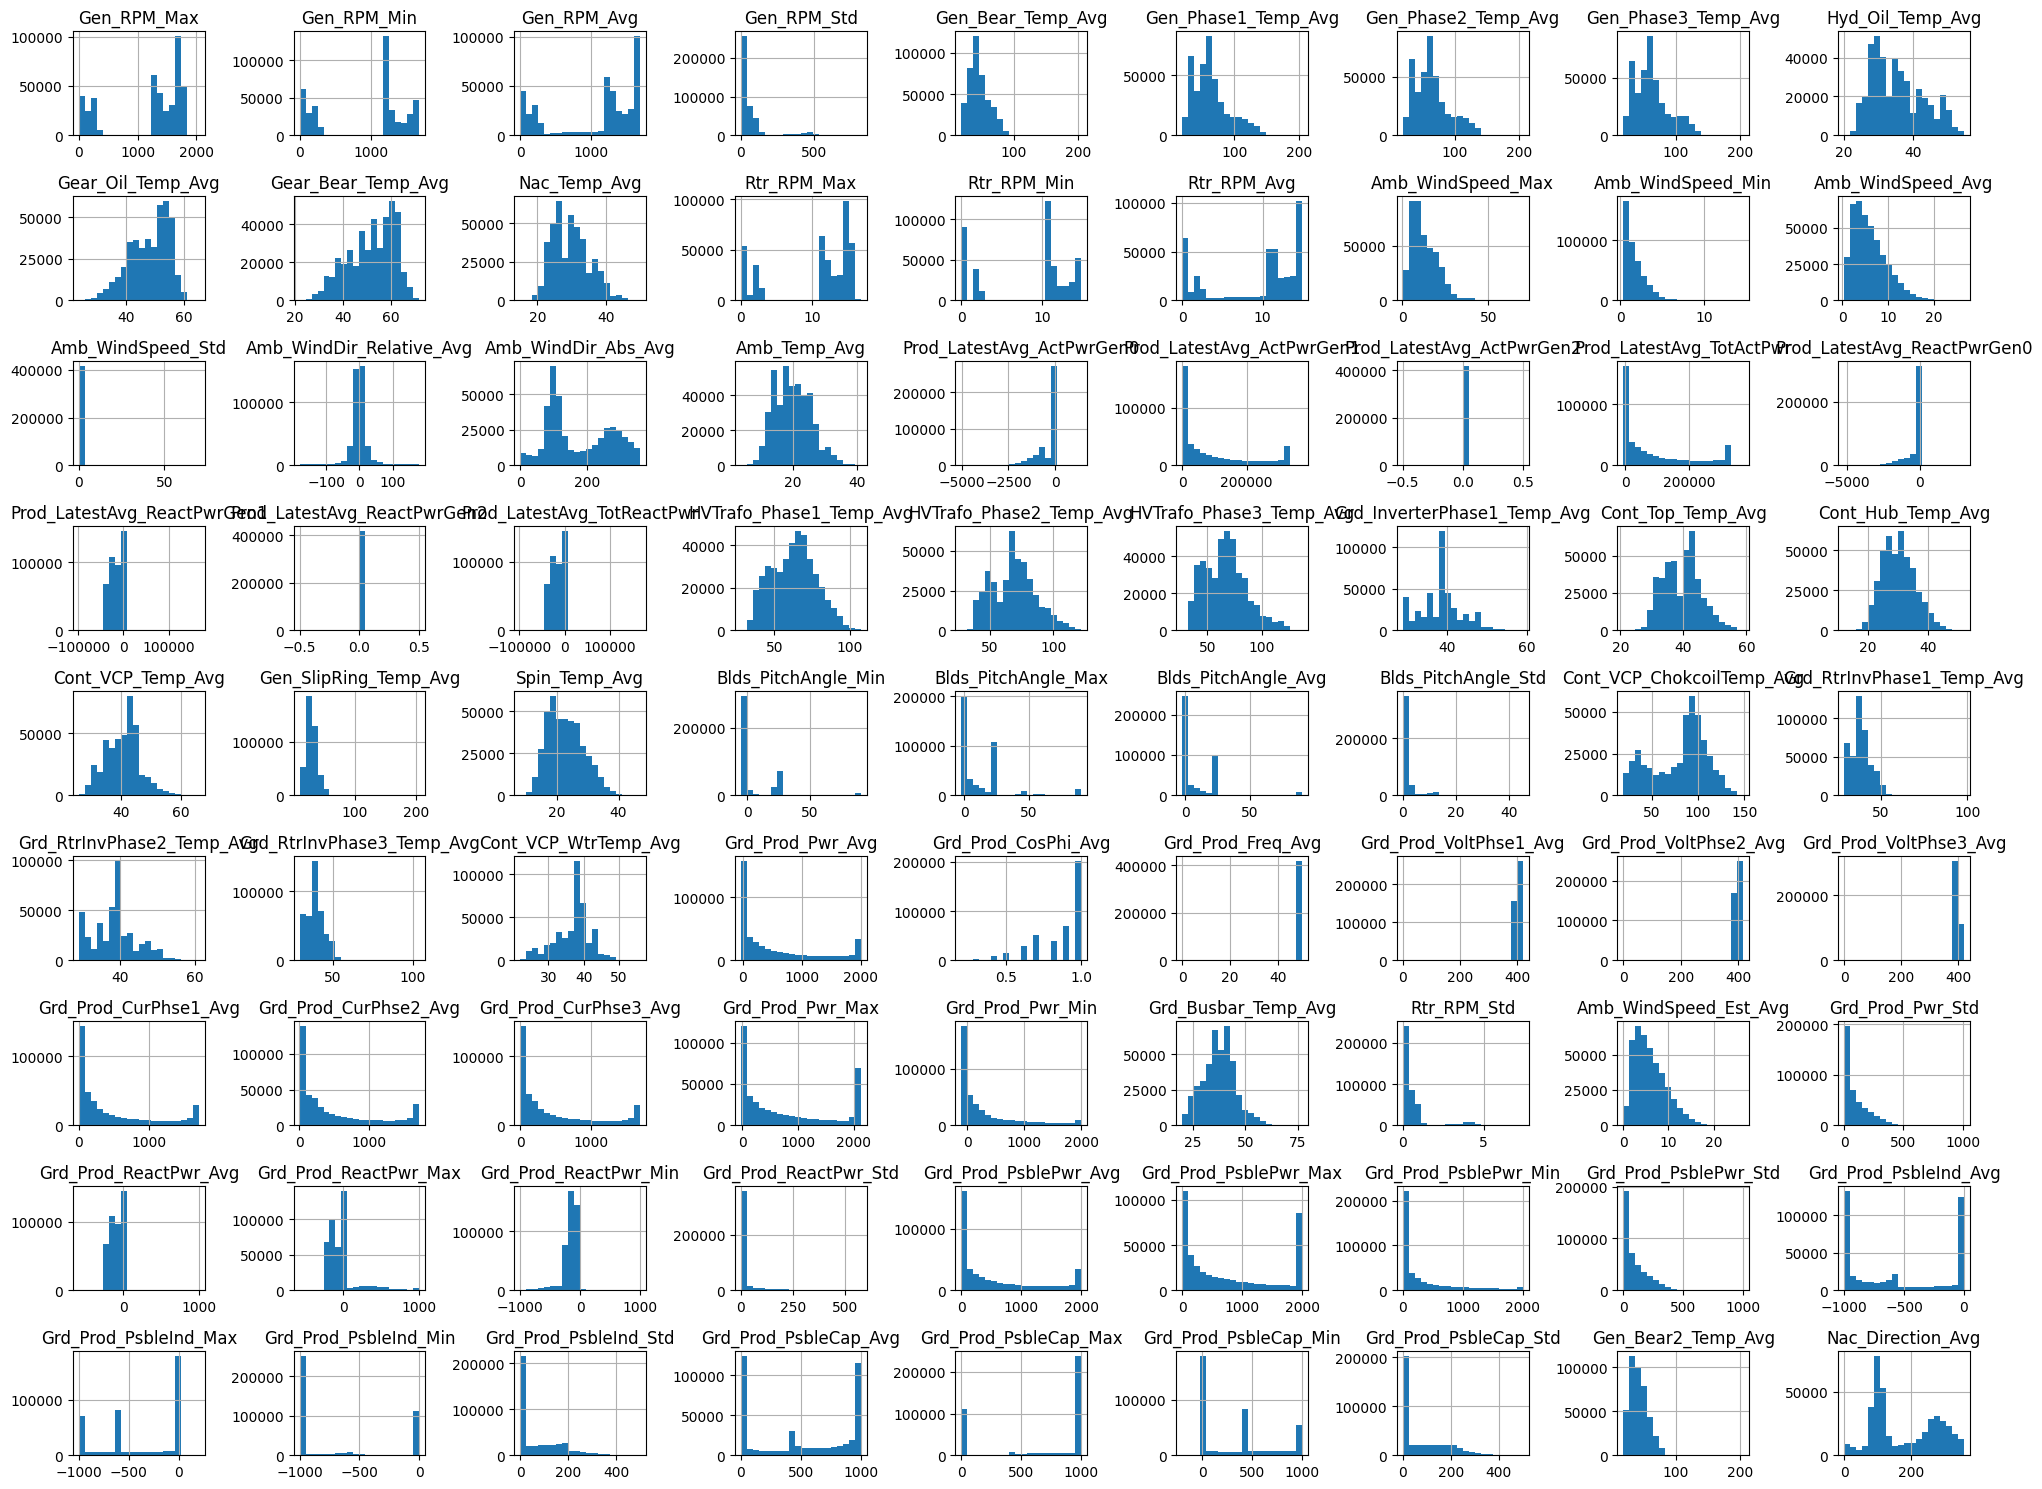

In [3]:
# plot hist for each column
def plotHist(dataDf):
    from matplotlib import pyplot as plt


    dataDf.hist(bins=20, figsize=(20,15), sharex=False, sharey=False)

    plt.tight_layout()
    plt.show()
    
plotHist(dataDf)

## Trash Columns 

1. Prod_LatestAvg_ActPwrGen2: all values are zeros
1. Prod_LatestAvg_ReactPwrGen2: all values are zeros
1. Grd_Prod_Freq_Avg: values are in 50 +- 0.1
1. Prod_LatestAvg_ReactPwrGen0 & Prod_LatestAvg_ActPwrGen0: 50% and 75% = 0


## Suspicious Columns

1. Amb_WindSpeed_Std: Most of its value is in range [0, 10%]
1. Amb_WindDir_Relative_Avg: 25-75 is in much smaller range than min-max
1. Gen_RPM_Min & Gen_RPM_Avg: 25% is much smaller than the rest. Maybe 0 for missing
1. Prod_LatestAvg_ReactPwrGen1: value range is not normal, and its neighbors (Prod_LatestAvg_ReactPwrGen0, Prod_LatestAvg_ReactPwrGen2) is identified as trash
1. Prod_LatestAvg_TotActPwr: Most of its value is in range [0, 10%]
1. 

## Other
Some prod columns contain negative values



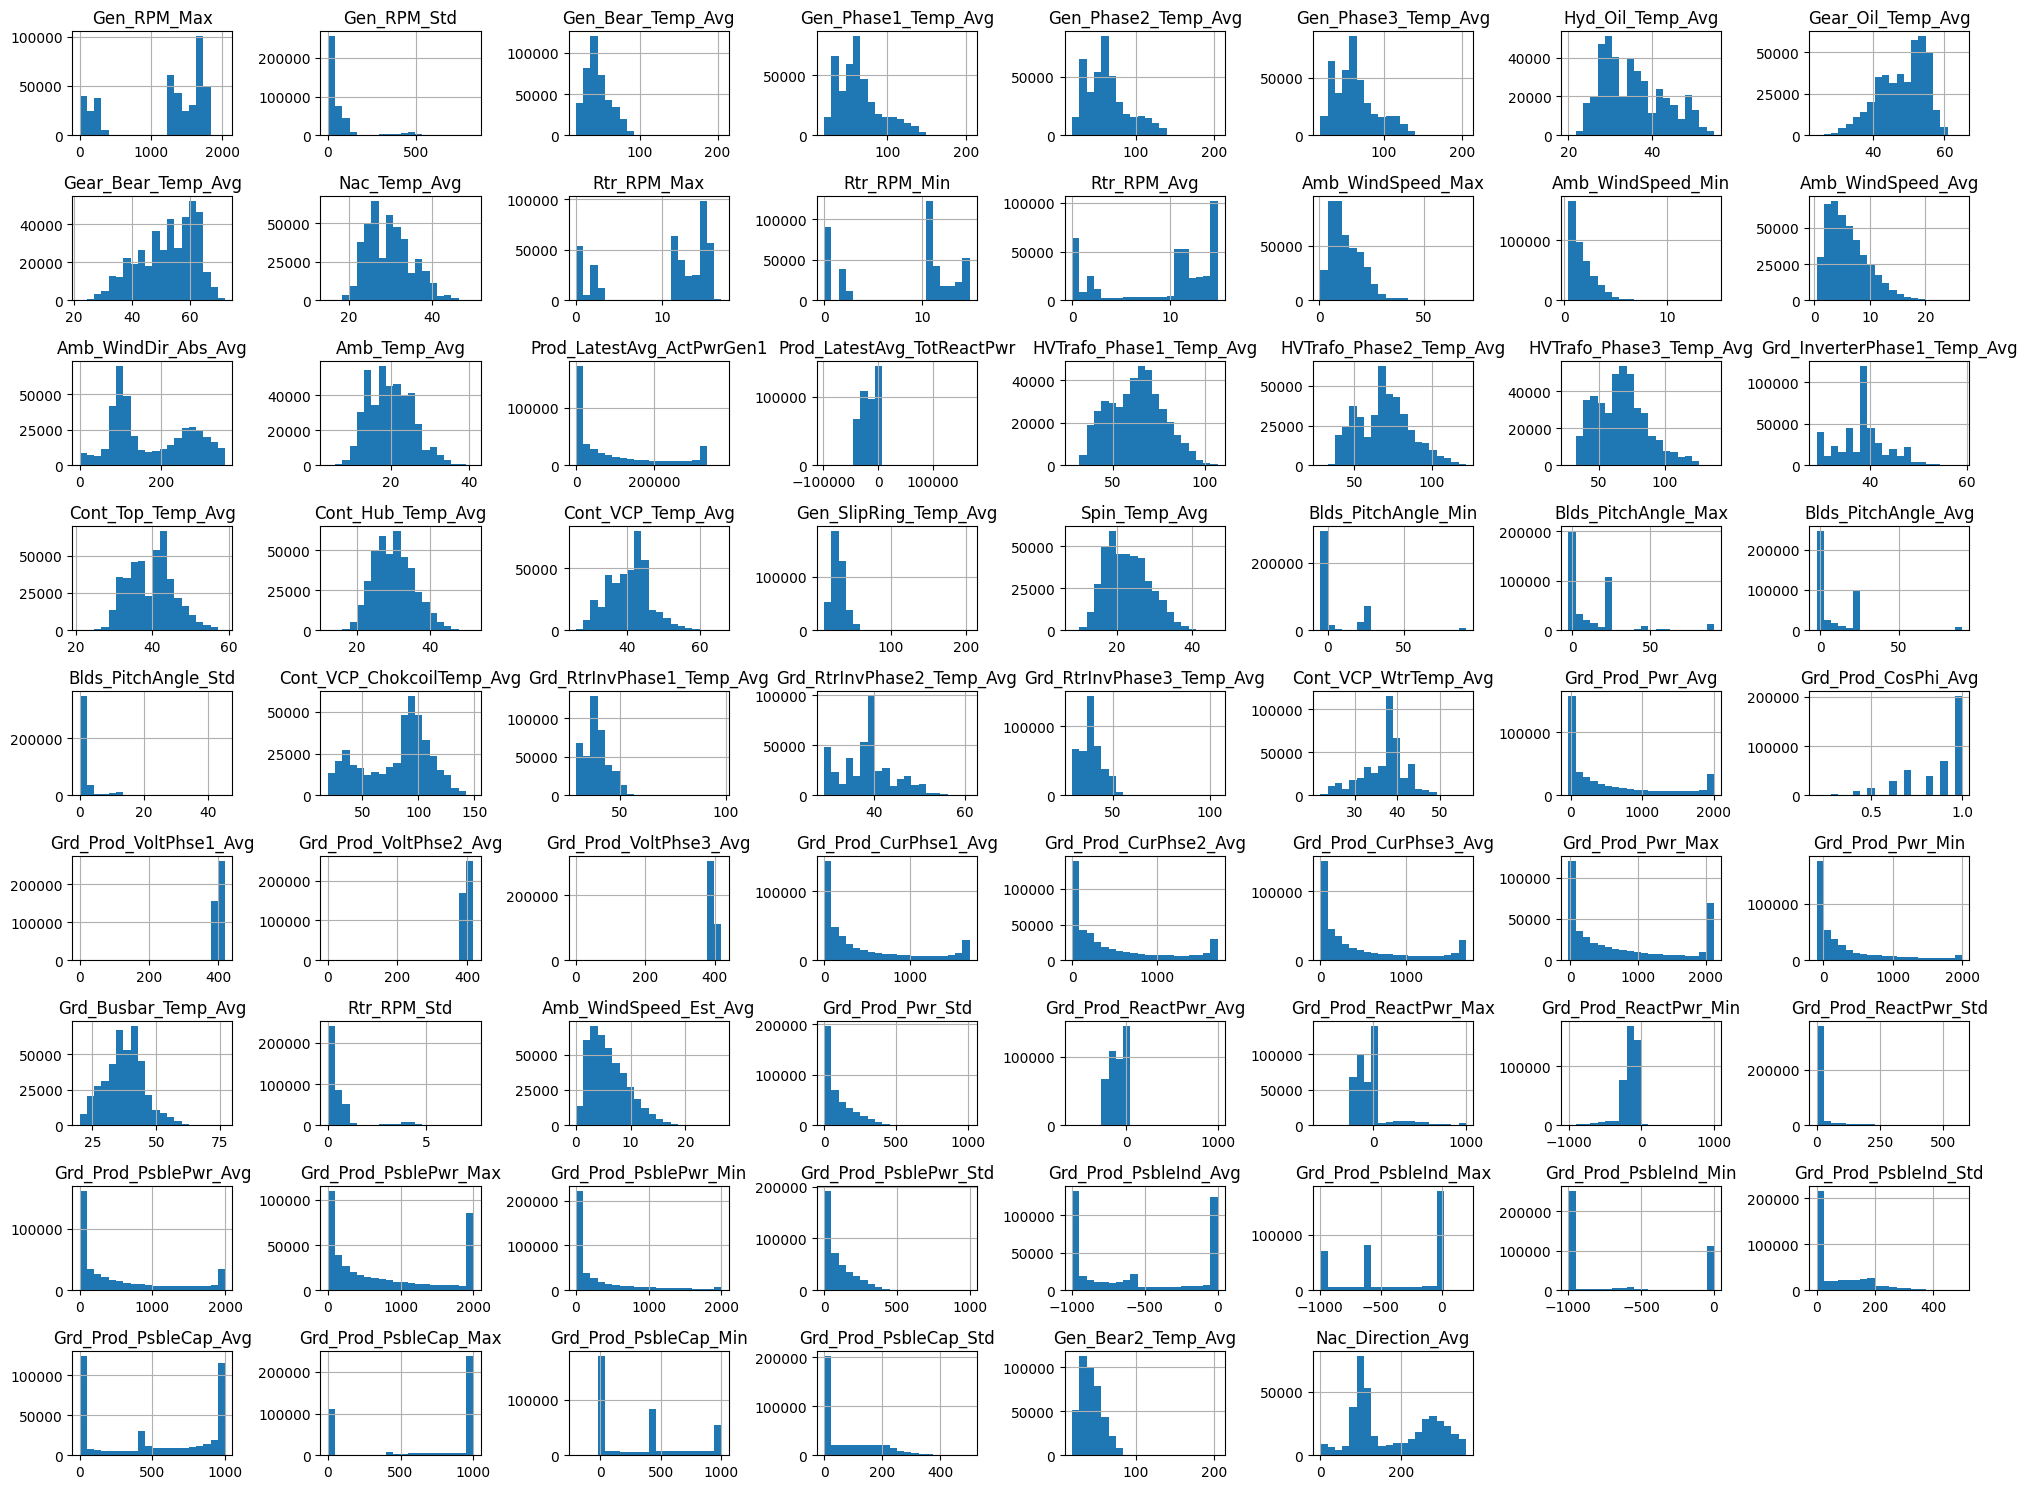

In [4]:
dfCleared = dataDf[[col for col in dataDf.columns if col not in [
    "Prod_LatestAvg_ActPwrGen2",
    "Prod_LatestAvg_ReactPwrGen2",
    "Grd_Prod_Freq_Avg",
    "Prod_LatestAvg_ReactPwrGen0",
    "Prod_LatestAvg_ActPwrGen0",
    "Amb_WindSpeed_Std",
    "Amb_WindDir_Relative_Avg",
    "Gen_RPM_Min",
    "Gen_RPM_Avg",
    "Prod_LatestAvg_ReactPwrGen1",
    "Prod_LatestAvg_TotActPwr"
]]]

plotHist(dfCleared)
                   

# Power curve

In [5]:
# columns containing the word "Wind"
windCols = [col for col in dataDf.columns if "Wind" in col]

print(len(windCols))
windCols

7


['Amb_WindSpeed_Max',
 'Amb_WindSpeed_Min',
 'Amb_WindSpeed_Avg',
 'Amb_WindSpeed_Std',
 'Amb_WindDir_Relative_Avg',
 'Amb_WindDir_Abs_Avg',
 'Amb_WindSpeed_Est_Avg']

In [6]:
dataDf[windCols].head()

,Amb_WindSpeed_Max,Amb_WindSpeed_Min,Amb_WindSpeed_Avg,Amb_WindSpeed_Std,Amb_WindDir_Relative_Avg,Amb_WindDir_Abs_Avg,Amb_WindSpeed_Est_Avg
0,11.6,0.5,3.3,0.9,-12.4,206.1,3.6
1,12.5,0.4,3.2,0.9,-1.1,217.4,3.3
2,8.8,0.7,4.3,1.0,-5.8,207.4,4.1
3,9.9,0.7,4.4,1.1,9.6,232.0,4.6
4,9.9,0.8,4.1,1.2,23.3,245.6,4.3


In [7]:
pwrCols = [col for col in dataDf.columns if "pwr" in col.lower()]

print(len(pwrCols))
pwrCols

20


['Prod_LatestAvg_ActPwrGen0',
 'Prod_LatestAvg_ActPwrGen1',
 'Prod_LatestAvg_ActPwrGen2',
 'Prod_LatestAvg_TotActPwr',
 'Prod_LatestAvg_ReactPwrGen0',
 'Prod_LatestAvg_ReactPwrGen1',
 'Prod_LatestAvg_ReactPwrGen2',
 'Prod_LatestAvg_TotReactPwr',
 'Grd_Prod_Pwr_Avg',
 'Grd_Prod_Pwr_Max',
 'Grd_Prod_Pwr_Min',
 'Grd_Prod_Pwr_Std',
 'Grd_Prod_ReactPwr_Avg',
 'Grd_Prod_ReactPwr_Max',
 'Grd_Prod_ReactPwr_Min',
 'Grd_Prod_ReactPwr_Std',
 'Grd_Prod_PsblePwr_Avg',
 'Grd_Prod_PsblePwr_Max',
 'Grd_Prod_PsblePwr_Min',
 'Grd_Prod_PsblePwr_Std']

In [7]:
from matplotlib import pyplot as plt


pwrCol = "Prod_LatestAvg_TotActPwr"
windCol = "Amb_WindSpeed_Avg"


def plotEnergyByWind(dataDf):
    dfSortedByWind = dataDf.sort_values(windCol)

    # draw an energy production curve
    plt.figure(figsize=(10, 6))
    plt.plot(dfSortedByWind[windCol], dfSortedByWind[pwrCol], ".")

    plt.title("Energy Production Curve", fontsize=14)
    plt.xlabel("Wind Speed", fontsize=12)
    plt.ylabel("Power Production", fontsize=12)

    plt.show()

In [3]:
turbineIdx = dataDf["Turbine_ID"].unique()
turbineIdx

array(['T01', 'T06', 'T07', 'T11'], dtype=object)

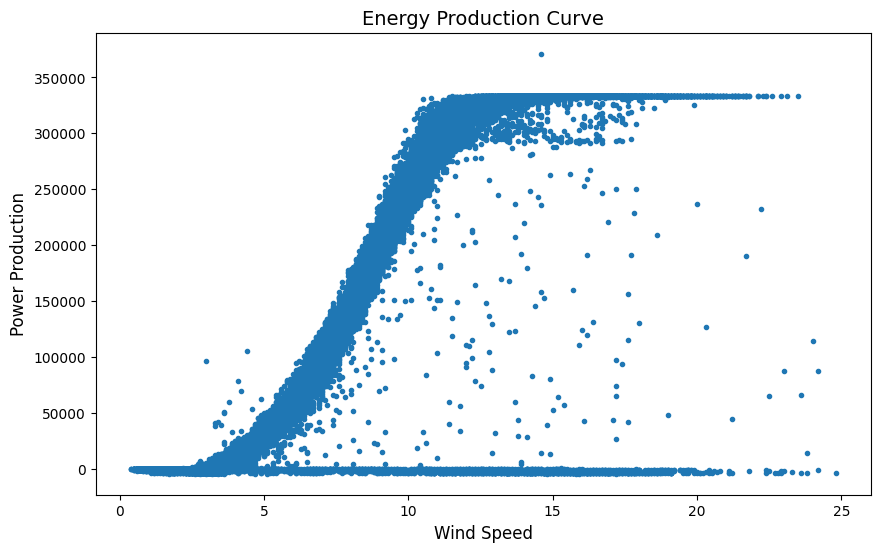

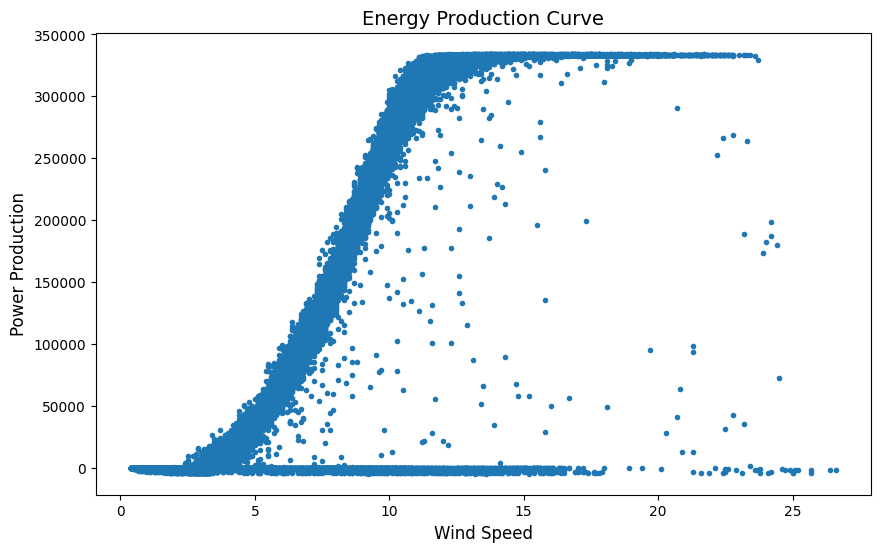

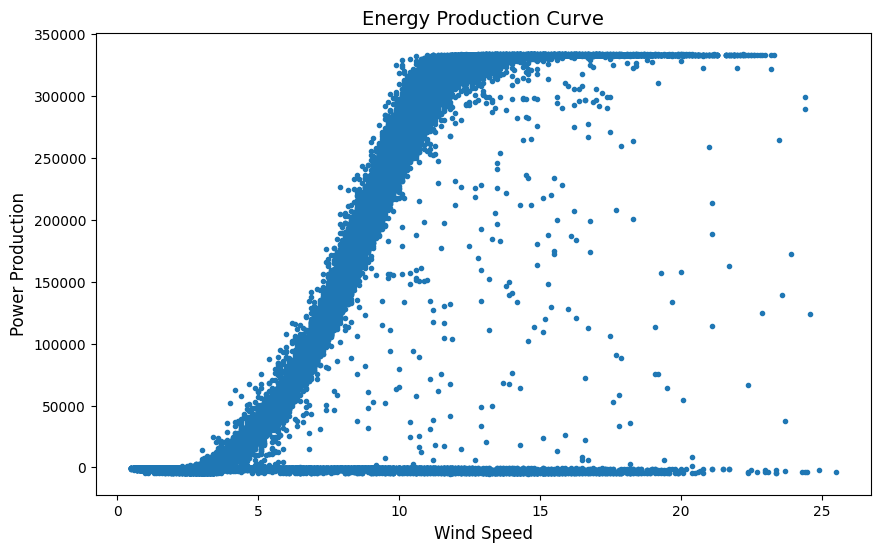

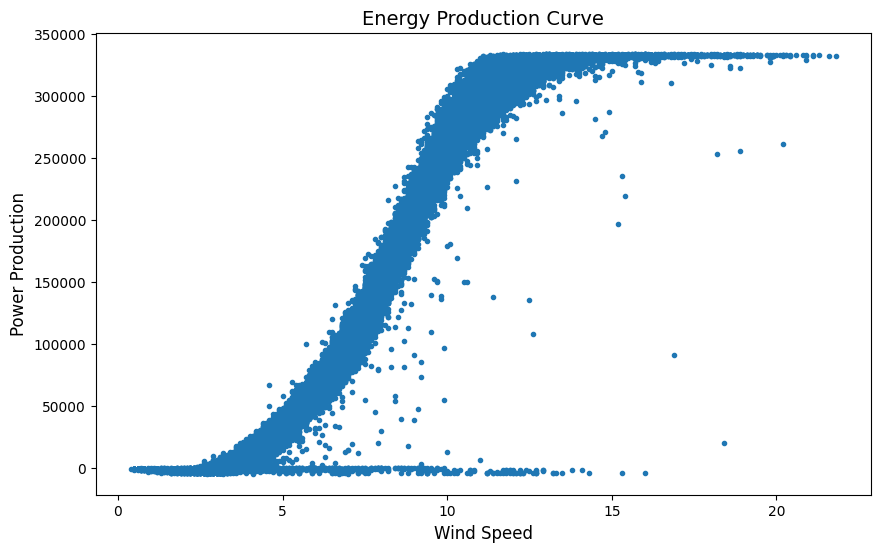

In [17]:
for idx in turbineIdx:
    dfTurbine = dataDf[dataDf["Turbine_ID"] == idx]
    plotEnergyByWind(dfTurbine)

/tmp/ipykernel_2007684/606592284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTurbine1["Timestamp"] = pd.to_datetime(dfTurbine1["Timestamp"])
/tmp/ipykernel_2007684/606592284.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  interval = pd.date_range(min, max, freq="6M").append(pd.DatetimeIndex([max]))


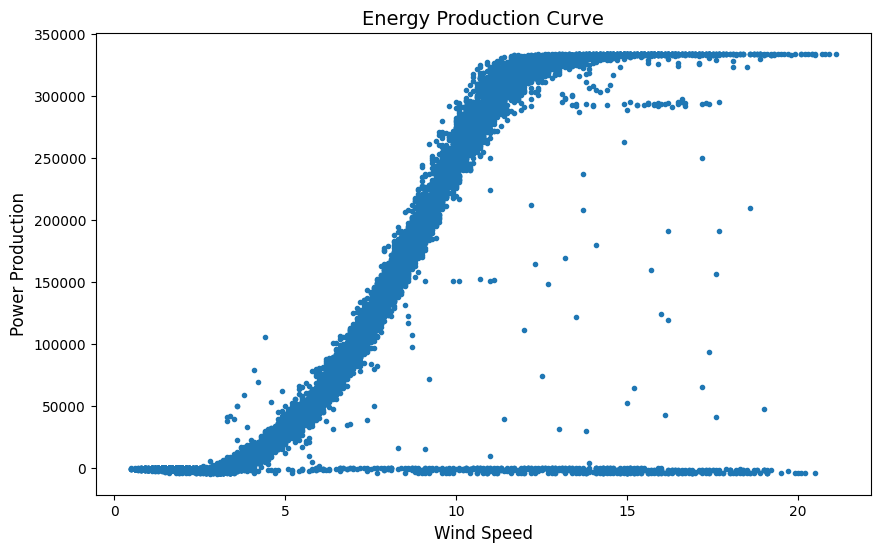

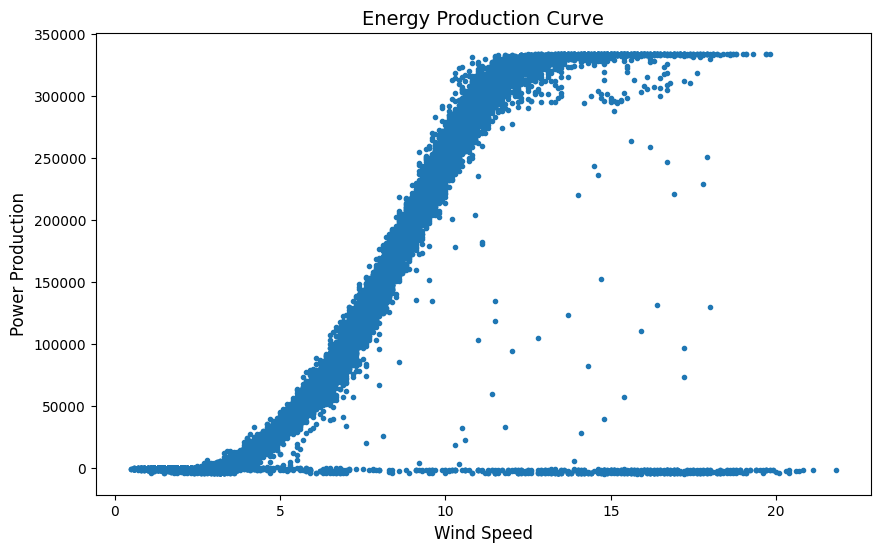

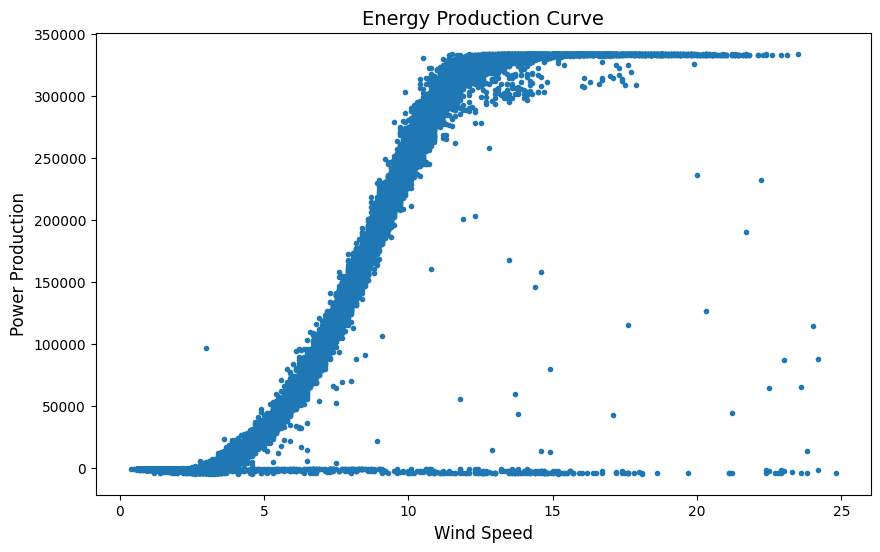

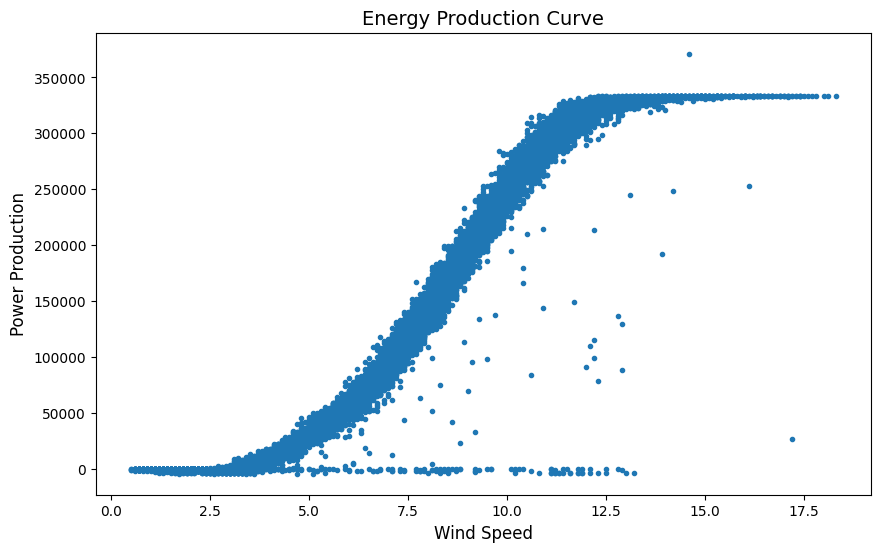

In [8]:
dfTurbine1 = dataDf[dataDf["Turbine_ID"] == turbineIdx[0]]
dfTurbine1["Timestamp"] = pd.to_datetime(dfTurbine1["Timestamp"])

# seperate into smaller df by time, 6 months
min = dfTurbine1["Timestamp"].min()
max = dfTurbine1["Timestamp"].max()

interval = pd.date_range(min, max, freq="6ME").append(pd.DatetimeIndex([max]))

dfsTurbin1 = []
for i in range(len(interval)-1):
    df = dfTurbine1[(dfTurbine1["Timestamp"] >= interval[i]) & (dfTurbine1["Timestamp"] < interval[i+1])]
    dfsTurbin1.append(df)
    
for df in dfsTurbin1:
    plotEnergyByWind(df)



